In [13]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
df = pd.DataFrame([
        ['2001-11-01', 0.998543],
        ['2001-11-02', 1.914526],
        ['2001-11-03', 3.057407],
        ['2001-11-04', 4.044301],
        ['2001-11-05', 4.952441],
        ['2001-11-06', 6.002932],
        ['2001-11-07', 6.930134],
        ['2001-11-08', 8.011137],
        ['2001-11-09', 9.040393],
        ['2001-11-10', 10.097007],
        ['2001-11-11', 11.063742],
        ['2001-11-12', 12.051951],
        ['2001-11-13', 13.062637],
        ['2001-11-14', 14.086016],
        ['2001-11-15', 15.096826],
        ['2001-11-16', 15.944886],
        ['2001-11-17', 17.027107],
        ['2001-11-18', 17.930240],
        ['2001-11-19', 18.984202],
        ['2001-11-20', 19.971603]
    ], columns=['date', 'count'])
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df = df.set_index('date')
print(df)

                count
date                 
2001-11-01   0.998543
2001-11-02   1.914526
2001-11-03   3.057407
2001-11-04   4.044301
2001-11-05   4.952441
2001-11-06   6.002932
2001-11-07   6.930134
2001-11-08   8.011137
2001-11-09   9.040393
2001-11-10  10.097007
2001-11-11  11.063742
2001-11-12  12.051951
2001-11-13  13.062637
2001-11-14  14.086016
2001-11-15  15.096826
2001-11-16  15.944886
2001-11-17  17.027107
2001-11-18  17.930240
2001-11-19  18.984202
2001-11-20  19.971603


In [15]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['count'])
result

print('adf => 적을수록 귀무가설을 기각시킬 확률이 높다')
print(result[0])
print('=='*50)
print('p_value 0.05 이하면 귀무가설 기각')
print(result[1])

adf => 적을수록 귀무가설을 기각시킬 확률이 높다
-7.573269903543337
p_value 0.05 이하면 귀무가설 기각
2.8045464591394192e-11


In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
def arima_aic_check(data, order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_list = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
    result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
    result_df.sort_values(sort, inplace=True)
    return result_df

In [20]:
temp=arima_aic_check(df,order=(3,3,3))

In [49]:
temp

,order,AIC
16,p:1 d:2 q:1,-38.847236
8,p:0 d:2 q:2,-38.358892
17,p:1 d:2 q:2,-36.898087
25,p:2 d:2 q:1,-36.887367
26,p:2 d:2 q:2,-36.476209
7,p:0 d:2 q:1,-35.650244
24,p:2 d:2 q:0,-34.923557
22,p:2 d:1 q:1,-33.926533
14,p:1 d:1 q:2,-33.507456
15,p:1 d:2 q:0,-32.849820


In [31]:
model = ARIMA(df, order=(2,0,0) ) #(p,d,q)

In [32]:
rfit=model.fit()

In [39]:

pred=rfit.predict('2001-11-01','2001-11-20')

(array([11627., 11629., 11631., 11633., 11635., 11637., 11639., 11641.,
        11643., 11645.]),
 [Text(11627.0, 0, '2001-11-01'),
  Text(11629.0, 0, '2001-11-03'),
  Text(11631.0, 0, '2001-11-05'),
  Text(11633.0, 0, '2001-11-07'),
  Text(11635.0, 0, '2001-11-09'),
  Text(11637.0, 0, '2001-11-11'),
  Text(11639.0, 0, '2001-11-13'),
  Text(11641.0, 0, '2001-11-15'),
  Text(11643.0, 0, '2001-11-17'),
  Text(11645.0, 0, '2001-11-19')])

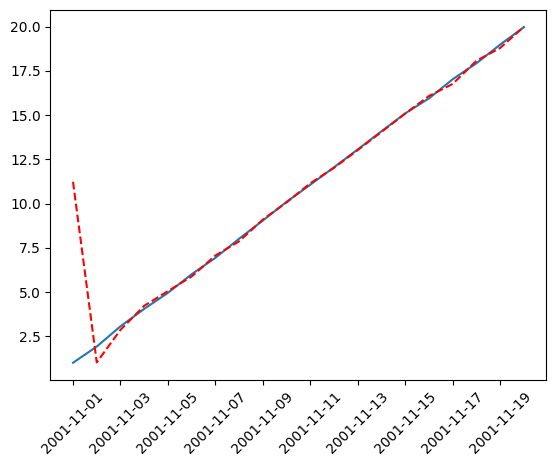

In [48]:
import matplotlib.pyplot as plt

plt.plot(df)
plt.plot(pd.DataFrame(pred),'--r')
plt.xticks(rotation=45)